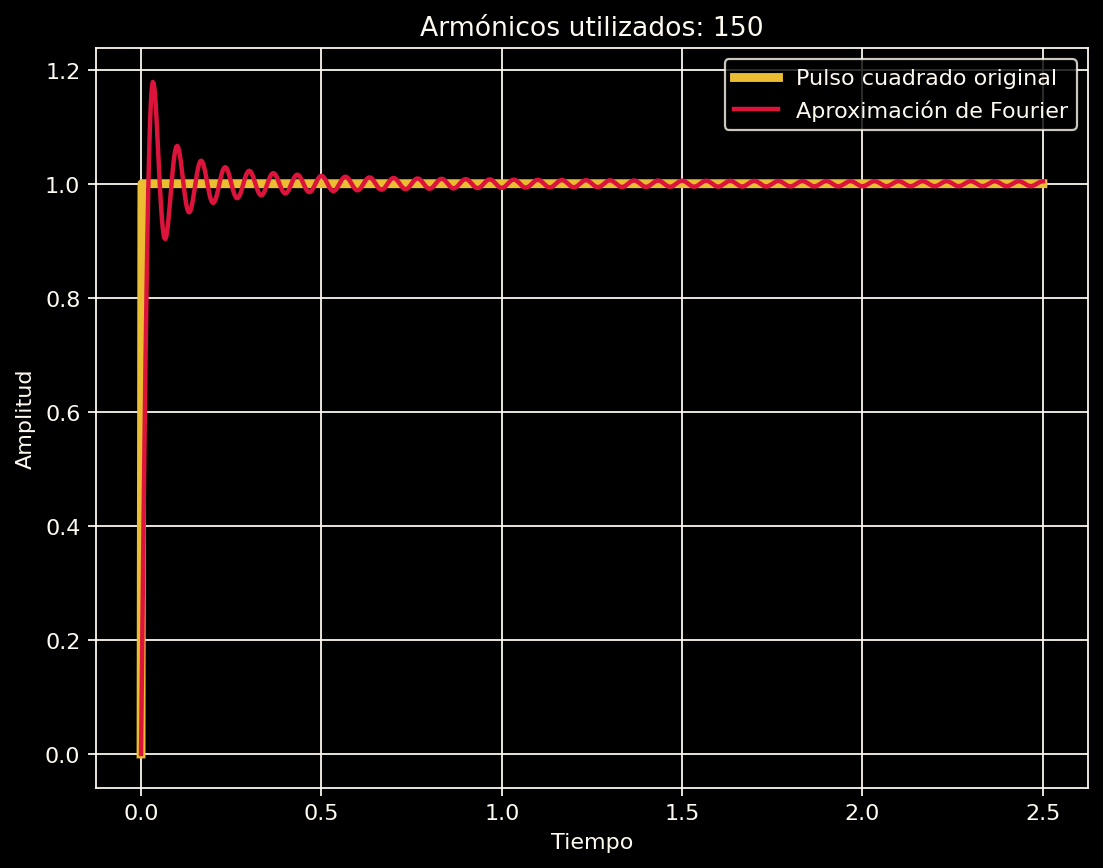

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definir los parámetros del pulso cuadrado
amplitud = 1.0
frecuencia = 0.1
duracion = 2.5
num_harm = 150  # Número de componentes de Fourier a considerar
num_points = 1000  # Número de puntos en la representación del pulso
fps = 30  # Cuadros por segundo

# Generar puntos en el tiempo
t = np.linspace(0, duracion, num_points)

# Calcular los coeficientes de Fourier
coefficients = np.zeros(num_harm + 1)
coefficients[1] = 4 / np.pi  # Coeficiente para la fundamental

for k in range(3, num_harm + 1, 2):
    coefficients[k] = 4 / (k * np.pi)  # Coeficientes para los armónicos impares

# Crear el pulso cuadrado original
original = amplitud * np.sign(np.sin(2 * np.pi * frecuencia * t))

# Crear una figura para la animación
fig, ax = plt.subplots(figsize=(8, 6), dpi=160)

# Configurar el fondo de color negro
fig.set_facecolor('black')
ax.set_facecolor('black')

# Función para actualizar los cuadros de la animación
def update_frame(i):
    ax.clear()
    approximation = np.zeros_like(t)

    for j in range(1, i + 1):
        approximation += coefficients[j] * np.sin(2 * np.pi * j * frecuencia * t)

    approximation *= amplitud

    # Configurar los colores de las líneas y texto
    color_original = '#EBBD33'
    color_approximation = 'crimson'
    color_text = 'floralwhite'

    ax.plot(t, original, color=color_original,linewidth=4.0, label='Pulso cuadrado original')
    ax.plot(t, approximation, color=color_approximation,linewidth=2.0, label='Aproximación de Fourier')
    ax.set_xlabel('Tiempo', color=color_text)
    ax.set_ylabel('Amplitud', color=color_text)
    ax.set_title(f'Armónicos utilizados: {i}', color=color_text)
    ax.legend(loc='upper right', facecolor='black', edgecolor=color_text, labelcolor=color_text)
    ax.grid(True, color=color_text)
    ax.spines['bottom'].set_color(color_text)
    ax.spines['top'].set_color(color_text)
    ax.spines['right'].set_color(color_text)
    ax.spines['left'].set_color(color_text)
    ax.tick_params(axis='x', colors=color_text)
    ax.tick_params(axis='y', colors=color_text)

# Calcular el número de cuadros de la animación
num_frames = num_harm + 1

# Calcular el intervalo entre cuadros en milisegundos
interval = 1000 / fps

# Crear la animación utilizando FuncAnimation
animation = FuncAnimation(fig, update_frame, frames=range(1, num_frames), interval=interval)

# Guardar la animación en formato GIF utilizando el escritor 'pillow'
animation.save('fourier_animation_v6.gif', writer='pillow', fps=fps)

# Mostrar la animación en una ventana emergente
plt.show()